In [1]:
from google.colab import files
uploaded = files.upload()


Saving student_responses_2022.csv to student_responses_2022.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [6]:
filename = list(uploaded.keys())[0]
df_2022 = pd.read_csv(filename)
df_2022.head()


,student_id,question_id,ability,difficulty,answered_correctly
0,1078,22,1.023237,-0.280792,True
1,1980,37,-2.243018,1.430540,False
2,1240,14,3.453396,-0.872714,True
3,1329,33,1.750230,0.816172,True
4,1995,17,2.288340,-0.558914,True


How did the student's ability to answer the questions change ?
Answer for this question is addresed in below cell






In [7]:


df_2022 = df_2022.sort_values(by=['student_id', 'question_id'])


df_2022['adjusted_ability'] = df_2022.apply(lambda row: row['ability'] + 0.1 * row['difficulty']
                                  if row['answered_correctly'] == 1
                                  else row['ability'], axis=1)

# Calculate the initial and final adjusted ability for each student
initial_adjusted_ability = df_2022.groupby('student_id')['adjusted_ability'].first()
final_adjusted_ability = df_2022.groupby('student_id')['adjusted_ability'].last()

adjusted_ability_change = final_adjusted_ability - initial_adjusted_ability


average_adjusted_ability_change = adjusted_ability_change.mean()


print("Average change in adjusted ability across all students:", average_adjusted_ability_change)
print("\nIndividual adjusted ability change for each student:\n", adjusted_ability_change)


Average change in adjusted ability across all students: 0.20112266080880759

Individual adjusted ability change for each student:
 student_id
1001    0.190812
1002    0.190812
1003    0.190812
1004    0.190812
1005    0.410289
          ...   
1996    0.000000
1997    0.000000
1998    0.190812
1999    0.000000
2000    0.190812
Name: adjusted_ability, Length: 1000, dtype: float64


How did the student's ability to answer the questions change ?




*  for this question questio_id vs cumulative ability is plotted for top 100 students.
*  from the below figure i understood relation between both variables are linear in nature




<ipython-input-8-0decaaa25b90>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_top['adjusted_ability'] = df_2022_top.apply(
<ipython-input-8-0decaaa25b90>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_top['cumulative_adjusted_ability'] = df_2022_top.groupby('student_id')['adjusted_ability'].cumsum()


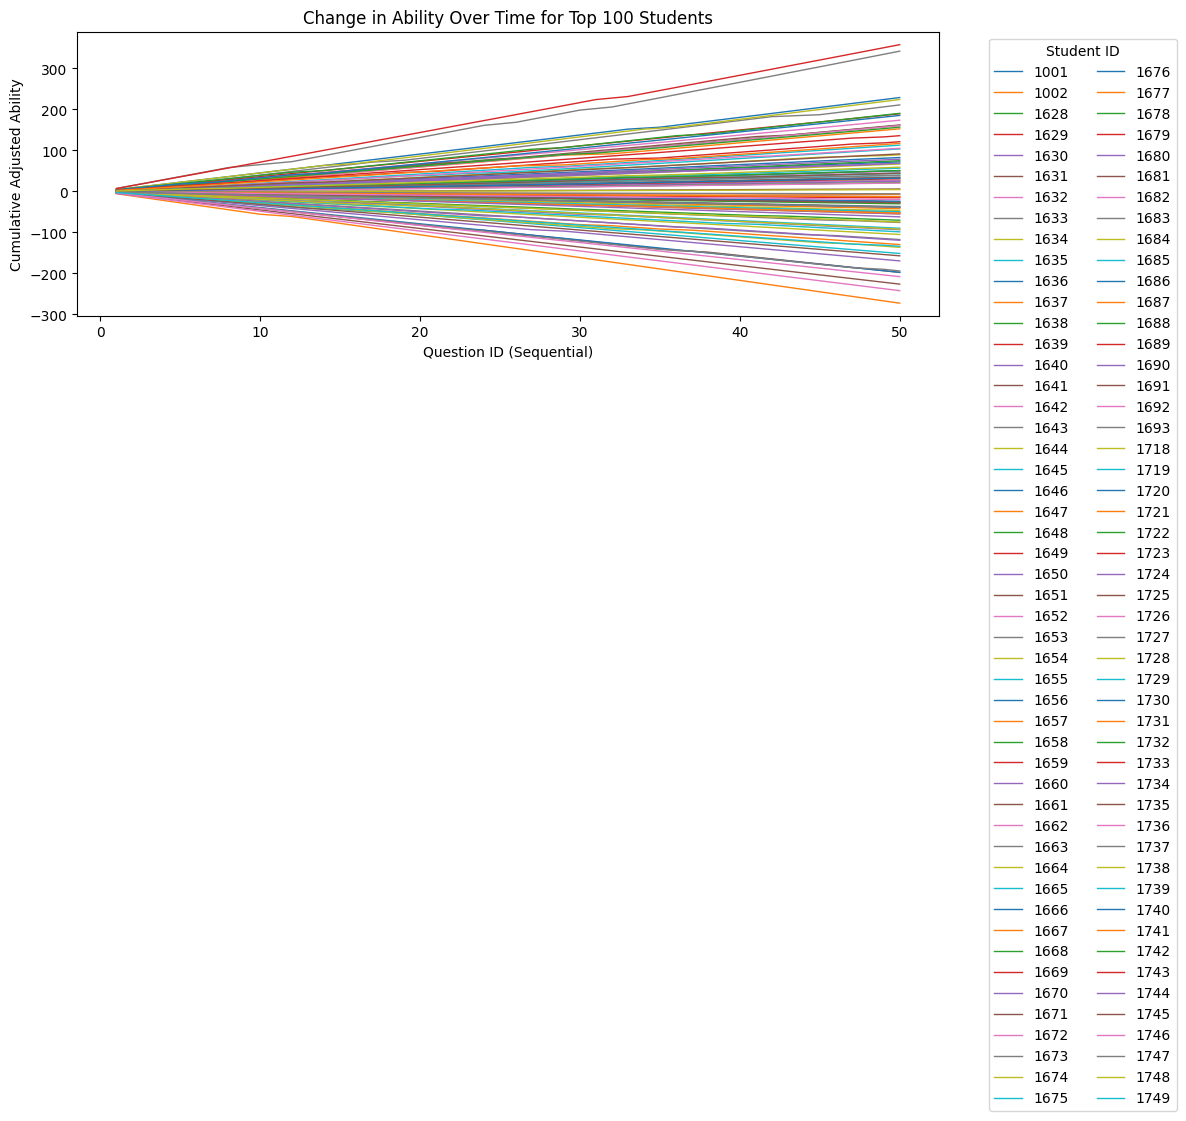

In [8]:

df_2022 = df_2022.sort_values(by=['student_id', 'question_id'])

# Identify the top 100 students based on the frequency of entries (assuming frequency implies "top" for this context)
top_students = df_2022['student_id'].value_counts().nlargest(100).index

# Filter the DataFrame for only these top 100 students
df_2022_top = df_2022[df_2022['student_id'].isin(top_students)]

# Calculate adjusted ability score based on correctness and difficulty
df_2022_top['adjusted_ability'] = df_2022_top.apply(
    lambda row: row['ability'] + 0.1 * row['difficulty'] if row['answered_correctly'] == 1 else row['ability'], axis=1
)

# Calculate cumulative adjusted ability for each student
df_2022_top['cumulative_adjusted_ability'] = df_2022_top.groupby('student_id')['adjusted_ability'].cumsum()

# Plot the change in cumulative adjusted ability for each of the top 100 students
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_2022_top, x='question_id', y='cumulative_adjusted_ability', hue='student_id', palette="tab10", linewidth=1)

# Enhancing plot details
plt.title('Change in Ability Over Time for Top 100 Students')
plt.xlabel('Question ID (Sequential)')
plt.ylabel('Cumulative Adjusted Ability')
plt.legend(title='Student ID', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()

plt.show()


Did the questions get difficult or easy?

*   absolute average calculated for each question because there are some negative values.


*   the trend is decreased to certain point and increased








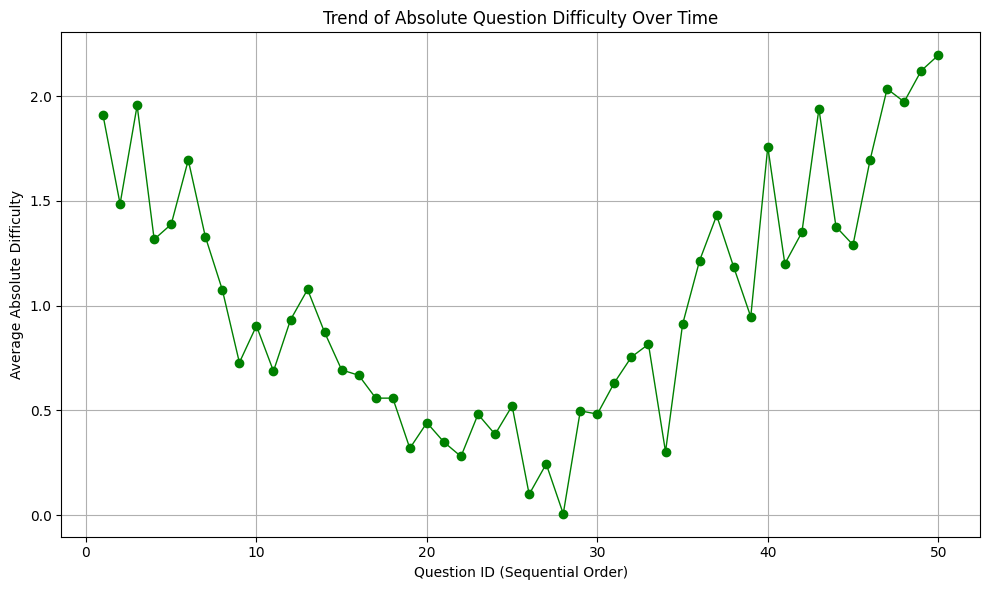

In [9]:

#2nd Question
# Using absolute values of difficulty for an alternative trend analysis
difficulty_trend_abs = df_2022.groupby('question_id')['difficulty'].apply(lambda x: x.abs().mean()).reset_index()

# Plot the absolute difficulty trend
plt.figure(figsize=(10, 6))
plt.plot(difficulty_trend_abs['question_id'], difficulty_trend_abs['difficulty'], color='g', marker='o', linestyle='-', linewidth=1)

# Enhancing plot details
plt.title('Trend of Absolute Question Difficulty Over Time')
plt.xlabel('Question ID (Sequential Order)')
plt.ylabel('Average Absolute Difficulty')
plt.grid(True)
plt.tight_layout()

plt.show()



Did the questions get difficult or easy?


*   from the below stats difficulty level is increased as going forward in questions




In [10]:
df_2022['positive'] = df_2022['difficulty'].apply(lambda x: 1 if x > 0 else 0)
df_2022['negative'] = df_2022['difficulty'].apply(lambda x: 1 if x < 0 else 0)

# Group by question_id and sum positive and negative counts
difficulty_counts = df_2022.groupby('question_id')[['positive', 'negative']].sum().reset_index()
print(difficulty_counts)

    question_id  positive  negative
0             1         0       983
1             2         0       986
2             3         0       979
3             4         0       987
4             5         0       977
5             6         0       976
6             7         0       976
7             8         0       981
8             9         0       975
9            10         0       977
10           11         0       984
11           12         0       986
12           13         0       979
13           14         0       975
14           15         0       975
15           16         0       978
16           17         0       985
17           18         0       980
18           19         0       987
19           20         0       974
20           21         0       965
21           22         0       979
22           23         0       984
23           24         0       987
24           25         0       975
25           26       975         0
26           27       983   

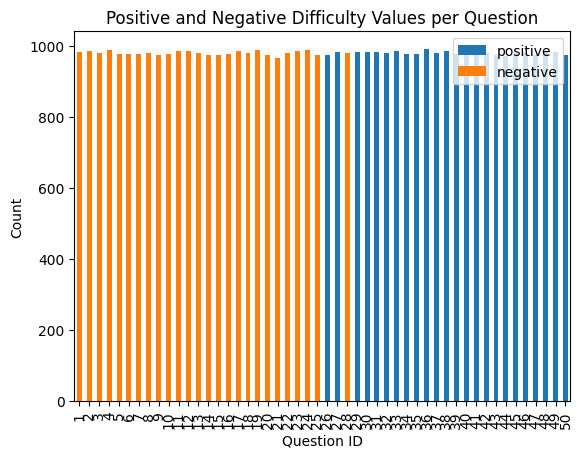

In [11]:


# Plotting the counts for positive and negative difficulties
difficulty_counts.set_index('question_id').plot(kind='bar', stacked=True)
plt.xlabel('Question ID')
plt.ylabel('Count')
plt.title('Positive and Negative Difficulty Values per Question')
plt.show()


Can you create a model that can predict if a student will answer a question correctly?


*   Random forest model implemented and evaluation metrics are calculated.



In [12]:


df_2022['ability'].fillna(df_2022['ability'].median(), inplace=True)
df_2022['difficulty'].fillna(df_2022['difficulty'].median(), inplace=True)


# Convert boolean target to integers (True/False to 1/0)
df_2022['answered_correctly'] = df_2022['answered_correctly'].astype(int)

#Split the df_2022 into features and target variable
X = df_2022[['ability', 'difficulty']]
y = df_2022['answered_correctly']

#Split df_2022 into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Predict on the test set
y_pred = model.predict(X_test)

#Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


<ipython-input-12-6bffeb958891>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2022['ability'].fillna(df_2022['ability'].median(), inplace=True)
<ipython-input-12-6bffeb958891>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

Model Evaluation Metrics:
Accuracy: 0.9873
Precision: 0.9896
Recall: 0.9860
F1 Score: 0.9878


Note down any other observations you may have about the data.


*   Distribution of student ability is almost in normal distribution
*   Distribution of difficulty is discrete in nature
*   Median of correctly answered is higher than wrongly answered w.r.t ability. so students has good ability to answer correctly
*   Median of correctly answered is lowered here, it represents students were able to answer for the questions which are in less difficult.






<ipython-input-13-6e386c174cfb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2022['ability'].fillna(df_2022['ability'].median(), inplace=True)
<ipython-input-13-6e386c174cfb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

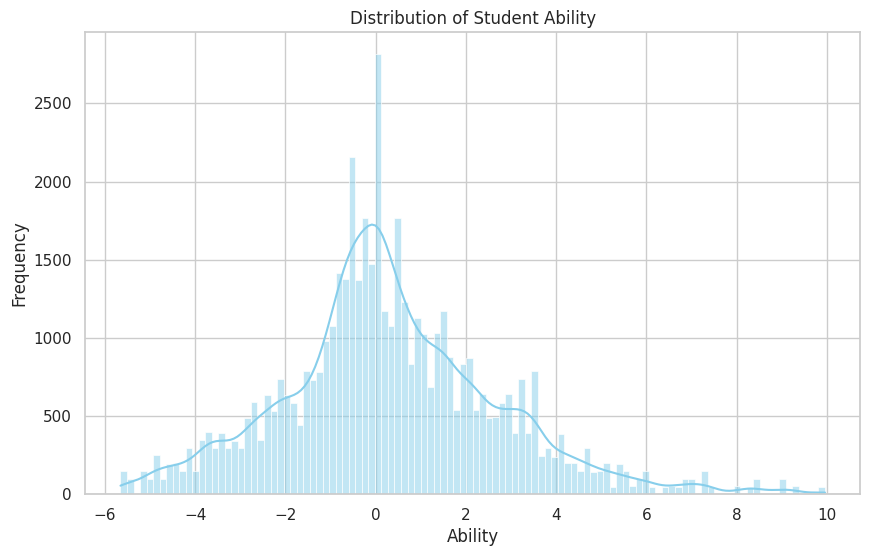

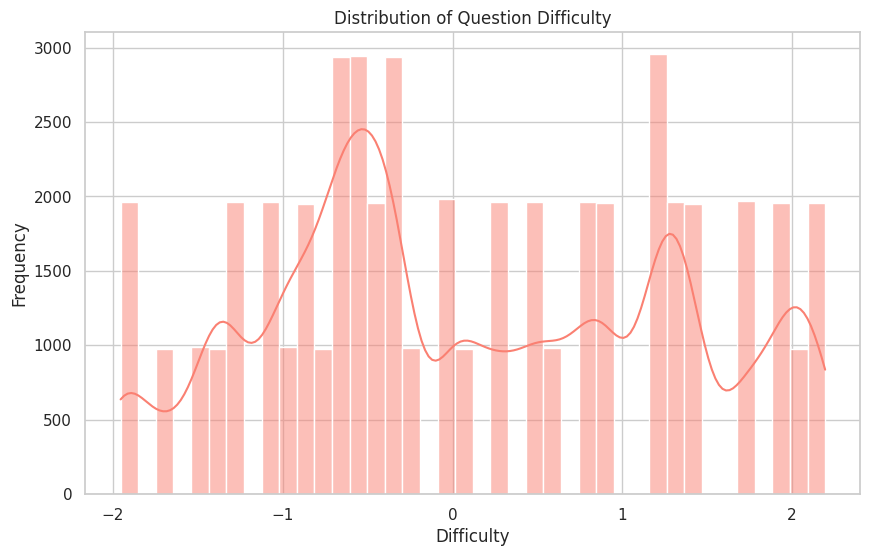

<ipython-input-13-6e386c174cfb>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='answered_correctly', y='ability', data=df_2022, palette="Set2")


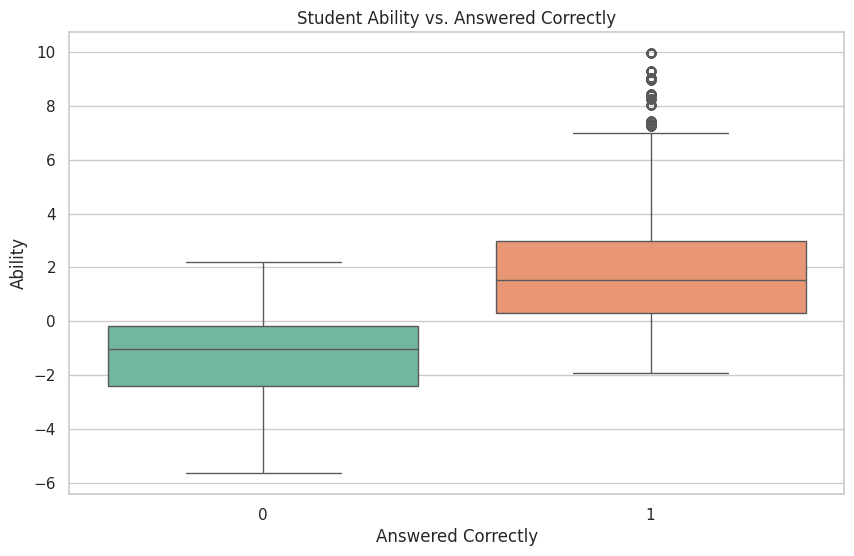

<ipython-input-13-6e386c174cfb>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='answered_correctly', y='difficulty', data=df_2022, palette="Set1")


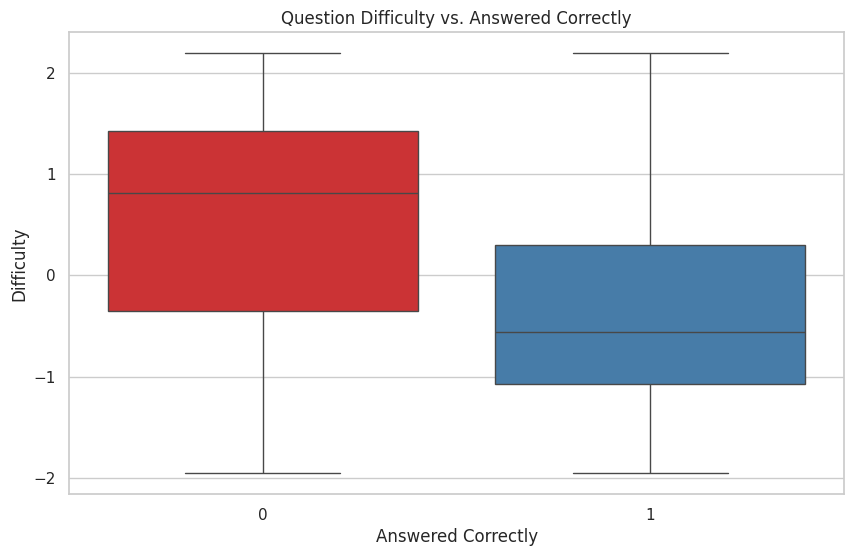

In [13]:

# Fill missing values for ease of analysis
df_2022['ability'].fillna(df_2022['ability'].median(), inplace=True)
df_2022['difficulty'].fillna(df_2022['difficulty'].median(), inplace=True)

# Convert the boolean column to int for visualizations
df_2022['answered_correctly'] = df_2022['answered_correctly'].astype(int)

# Set style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Student Ability
plt.figure(figsize=(10, 6))
sns.histplot(df_2022['ability'], kde=True, color='skyblue')
plt.title("Distribution of Student Ability")
plt.xlabel("Ability")
plt.ylabel("Frequency")
plt.show()

# 2. Distribution of Question Difficulty
plt.figure(figsize=(10, 6))
sns.histplot(df_2022['difficulty'], kde=True, color='salmon')
plt.title("Distribution of Question Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Frequency")
plt.show()

# 3. Relationship Between Ability and Correct Answers
plt.figure(figsize=(10, 6))
sns.boxplot(x='answered_correctly', y='ability', data=df_2022, palette="Set2")
plt.title("Student Ability vs. Answered Correctly")
plt.xlabel("Answered Correctly")
plt.ylabel("Ability")
plt.show()

# 4. Relationship Between Difficulty and Correct Answers
plt.figure(figsize=(10, 6))
sns.boxplot(x='answered_correctly', y='difficulty', data=df_2022, palette="Set1")
plt.title("Question Difficulty vs. Answered Correctly")
plt.xlabel("Answered Correctly")
plt.ylabel("Difficulty")
plt.show()
